<a href="https://colab.research.google.com/github/Dana1402/NeuralNetworksScripts/blob/main/Conv_NN_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
def show_cifar(images, labels, predicted_labels=None):
  plt.figure(figsize=(10,10))
  for i in range(16):
      plt.subplot(4,4, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      if predicted_labels is not None:
          title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
          if labels[i] != predicted_labels[i]:
              plt.setp(title_obj, color='r')
      else:
          plt.title(f"Real label: {labels[i]}")

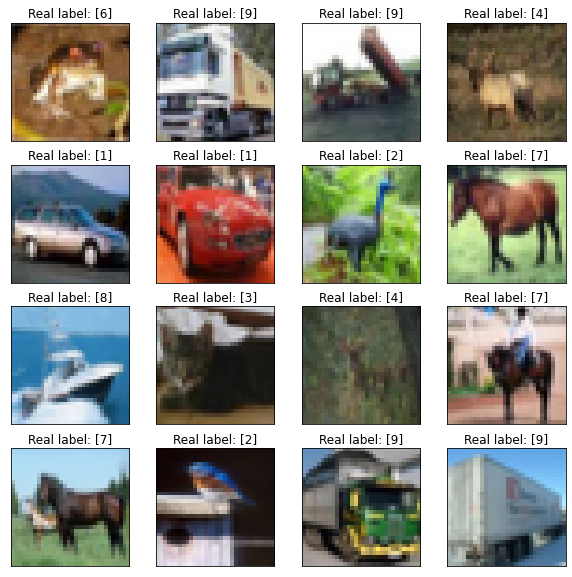

In [ ]:
show_cifar(x_train, y_train)

In [ ]:
def get_2_categories(x_train, y_train, x_test, y_test, a,b):
  """
    a,b - получаем данные для 2 категорий (индексы)
    
  """
  train_x, train_y, test_x, test_y = [],[],[],[]
  for i in range(len(y_train)):
    if y_train[i] in (a,b):
      train_x.append(x_train[i])
      train_y.append(y_train[i])

  for i in range(len(y_test)):
    if y_test[i] in (a,b):
      test_x.append(x_test[i])
      test_y.append(y_test[i])

  return np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [ ]:
x_train, y_train, x_test, y_test = get_2_categories(x_train, y_train, x_test, y_test, 0, 1)

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
model = models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(2,3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 512, validation_data = (x_test, y_test))

Epoch 1/30
20/20 [==============================] - 13s 665ms/step - loss: 0.2657 - accuracy: 0.8894 - val_loss: 0.2664 - val_accuracy: 0.8940
Epoch 2/30
20/20 [==============================] - 13s 662ms/step - loss: 0.2510 - accuracy: 0.8969 - val_loss: 0.3245 - val_accuracy: 0.8585
Epoch 3/30
20/20 [==============================] - 13s 661ms/step - loss: 0.2567 - accuracy: 0.8928 - val_loss: 0.3075 - val_accuracy: 0.8715
Epoch 4/30
20/20 [==============================] - 13s 659ms/step - loss: 0.2331 - accuracy: 0.9041 - val_loss: 0.3007 - val_accuracy: 0.8745
Epoch 5/30
20/20 [==============================] - 13s 662ms/step - loss: 0.2574 - accuracy: 0.8891 - val_loss: 0.2703 - val_accuracy: 0.8945
Epoch 6/30
20/20 [==============================] - 13s 660ms/step - loss: 0.2141 - accuracy: 0.9144 - val_loss: 0.3711 - val_accuracy: 0.8300
Epoch 7/30
20/20 [==============================] - 13s 663ms/step - loss: 0.2169 - accuracy: 0.9119 - val_loss: 0.2880 - val_accuracy: 0.8830

# Visialization

In [ ]:
def visualize_loss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

  plt.plot(epochs, acc_values, 'bo', label = 'Training acc', c = 'red')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc', c = 'red')

  plt.title('Training and validation loss/accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss,accuracy')
  plt.legend()

  plt.show()

In [ ]:
visualize_loss(history)

NameError: ignored

In [ ]:
def show_cifar(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i].argmax()}")
            if labels[i] != predicted_labels[i].argmax():
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

63/63 [==============================] - 1s 17ms/step


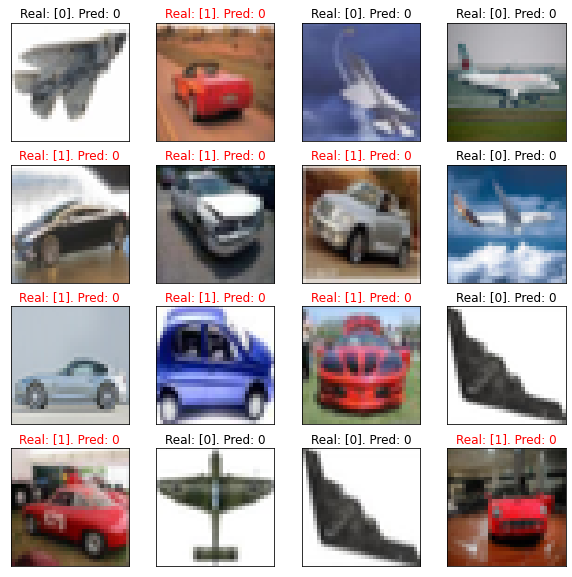

In [ ]:
predicted_labels = model.predict(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_cifar(x_test[idxs], y_test[idxs], predicted_labels[idxs])